In [6]:
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import SPSA, ADAM
import numpy as np
import matplotlib.pyplot as plt

from gates import pauli_x_gate, pauli_z_gate

In [7]:
num_qubits = 2
ansatz = TwoLocal(num_qubits, 'ry', 'cz')
optimizer = ADAM(maxiter=5000)

In [8]:
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)

/var/folders/79/zdv5htt15x92kt2dpnpnz09m0000gn/T/ipykernel_9957/2449948782.py:1: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [9]:
# Construct matrix
X = pauli_x_gate()
Z = pauli_z_gate()

Hx = 2.0
Hz = 3.0
H0_diagonal = [0.0, 2.5, 6.5, 7.0]

H0 = np.diag(H0_diagonal)
HI = Hx * np.kron(X, X) + Hz * np.kron(Z, Z)


<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
/var/folders/79/zdv5htt15x92kt2dpnpnz09m0000gn/T/ipykernel_9957/3447787658.py:14: SyntaxWarning: invalid escape sequence '\l'
  plt.title("Eigenenergy vs. $\lambda$")


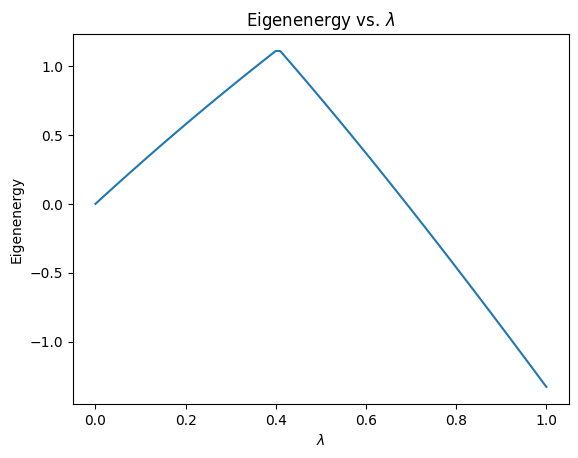

In [10]:
def problem_e() -> None:
    n_lambda_values = 101
    lambdas = np.linspace(0, 1, n_lambda_values)

    lower_eig = []

    for lmbda in lambdas:
        H2_op = SparsePauliOp.from_operator(H0 + lmbda*HI)

        minresult = vqe.compute_minimum_eigenvalue(H2_op)
        lower_eig.append(minresult.eigenvalue)

    plt.plot(lambdas, lower_eig)
    plt.title("Eigenenergy vs. $\lambda$")
    plt.xlabel(r"$\lambda$")
    plt.ylabel("Eigenenergy")
    plt.savefig("images/problem_e.png")
    plt.show()

problem_e()